In [84]:
# importing necessary librarys
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans



# Data Processing

In [40]:
# reading given data and visualizing it
dfBLN = pd.read_csv("2021\\JAR_FA_BLNS_2022.csv",sep=',')
dfBLN.head(2)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data
0,302635624,"UAB ""Verslo krepšelis""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),01/01/2021,31/12/2021,21/10/2022,2884.0,12.0,0.0,2896.0,01/03/2023
1,304715624,"UAB ""Donstone""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),01/01/2021,31/12/2021,04/05/2022,5831.0,157443.0,52022.0,111252.0,01/03/2023


In [41]:
# reading given data and visualizing it
dfPLNA = pd.read_csv("2021\\JAR_FA_PLNA_2022.csv",sep=',')
dfPLNA.head(2)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data
0,301011561,"UAB ""Rustela""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,01/01/2021,31/12/2021,02/01/2022,-91.0,-91.0,NaN,01/03/2023
1,303641352,"UAB ""Globali technologija""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,01/01/2021,31/12/2021,27/05/2022,0.0,0.0,NaN,01/03/2023


In [42]:
# reading given data and visualizing it
dfRating = pd.read_csv("2021\\ImoniuReitingai2021.csv",sep=',')
dfRating.head(2)

,Financial Report Name,obj_kodas,Company Reg. No.: Business Name,Company Reg. No.: Name from Register,Year (as Number),From Date,Till Date,Annual Rating Value,Annual Rating Group
0,FISCAL FINANCIAL STATEMENT,302331824,IDĖJŲ VALDA. UAB,"""IDĖJŲ VALDA"". UAB",2021,01/01/2021,31/12/2021,1.66,B
1,FISCAL FINANCIAL STATEMENT,171295543,DRAUGAS. ŽEMĖS ŪKIO BENDROVĖ,"ŽEMĖS ŪKIO BENDROVĖ ""DRAUGAS""",2021,01/07/2020,30/06/2021,1.90,B


In [43]:
df1 = pd.merge(dfBLN, dfPLNA, on=["obj_kodas","laikotarpis_nuo"], how="inner")
df1.head(2)

,obj_kodas,obj_pav_x,form_kodas_x,form_pav_x,stat_statusas_x,stat_pav_x,template_id_x,template_name_x,standard_id_x,standard_name_x,laikotarpis_nuo,laikotarpis_iki_x,reg_date_x,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data_x,obj_pav_y,form_kodas_y,form_pav_y,stat_statusas_y,stat_pav_y,template_id_y,template_name_y,standard_id_y,standard_name_y,laikotarpis_iki_y,reg_date_y,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data_y
0,302635624,"UAB ""Verslo krepšelis""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),01/01/2021,31/12/2021,21/10/2022,2884.0,12.0,0.0,2896.0,01/03/2023,"UAB ""Verslo krepšelis""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),31/12/2021,21/10/2022,NaN,-12.0,NaN,01/03/2023
1,304715624,"UAB ""Donstone""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),01/01/2021,31/12/2021,04/05/2022,5831.0,157443.0,52022.0,111252.0,01/03/2023,"UAB ""Donstone""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,31/12/2021,04/05/2022,4595.0,4360.0,101058.0,01/03/2023


In [44]:
# Drop multiple columns
df1 = df1.drop(['template_id_x', 'template_name_x', 'standard_id_x', 'standard_name_x', 'template_id_y', 'standard_id_y','stat_pav_y','template_name_y','standard_name_y','laikotarpis_iki_y','reg_date_y','formavimo_data_x','obj_pav_y','form_kodas_y','form_pav_y','stat_statusas_y'], axis=1)


In [45]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
df1.head(2)

,obj_kodas,obj_pav_x,form_kodas_x,form_pav_x,stat_statusas_x,stat_pav_x,laikotarpis_nuo,laikotarpis_iki_x,reg_date_x,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data_y
0,302635624,"UAB ""Verslo krepšelis""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,01/01/2021,31/12/2021,21/10/2022,2884.0,12.0,0.0,2896.0,NaN,-12.0,NaN,01/03/2023
1,304715624,"UAB ""Donstone""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,01/01/2021,31/12/2021,04/05/2022,5831.0,157443.0,52022.0,111252.0,4595.0,4360.0,101058.0,01/03/2023


In [46]:
df = dfRating.merge(df1, on='obj_kodas', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248 entries, 0 to 2247
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Financial Report Name                 2248 non-null   object 
 1   obj_kodas                             2248 non-null   int64  
 2   Company Reg. No.: Business Name       2246 non-null   object 
 3   Company Reg. No.: Name from Register  2245 non-null   object 
 4   Year (as Number)                      2248 non-null   int64  
 5   From Date                             2248 non-null   object 
 6   Till Date                             2248 non-null   object 
 7   Annual Rating Value                   2248 non-null   float64
 8   Annual Rating Group                   2248 non-null   object 
 9   obj_pav_x                             2248 non-null   object 
 10  form_kodas_x                          2248 non-null   int64  
 11  form_pav_x       

In [47]:
# Drop rows with NaN values in both 'X' and 'Y' columns
df = df[~(df['nuosavas_kapitalas'].isna() | df['mok_sumos_ir_isipareigojimai'].isna() | df['ilgalaikis_turtas'].isna() | df['trumpalaikis_turtas'].isna() | df['pelnas_pries_apmokestinima'].isna() | df['grynasis_pelnas'].isna() | df['pardavimo_pajamos'].isna())]
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Financial Report Name                 1933 non-null   object 
 1   obj_kodas                             1933 non-null   int64  
 2   Company Reg. No.: Business Name       1931 non-null   object 
 3   Company Reg. No.: Name from Register  1930 non-null   object 
 4   Year (as Number)                      1933 non-null   int64  
 5   From Date                             1933 non-null   object 
 6   Till Date                             1933 non-null   object 
 7   Annual Rating Value                   1933 non-null   float64
 8   Annual Rating Group                   1933 non-null   object 
 9   obj_pav_x                             1933 non-null   object 
 10  form_kodas_x                          1933 non-null   int64  
 11  form_pav_x       

# Experiments?

In [48]:
# List of the 7 column names you want to select
selected_column_names = ['nuosavas_kapitalas', 'mok_sumos_ir_isipareigojimai', 'ilgalaikis_turtas', 'trumpalaikis_turtas', 'pelnas_pries_apmokestinima', 'grynasis_pelnas', 'pardavimo_pajamos','Annual Rating Value']

# Create a new DataFrame with the selected columns
dataNoClead = df[selected_column_names]

dataNoClead.sample(n=2, random_state=24)

,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,Annual Rating Value
1602,-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,143261.0,4.01
729,15974000.0,13697000.0,2890000.0,30810000.0,4492000.0,4552000.0,512128000.0,2.56


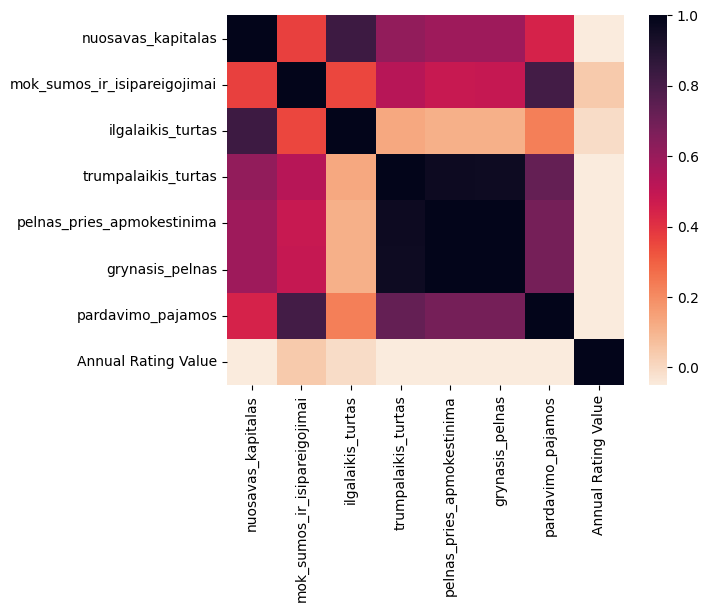

In [49]:
cmap = sns.cm.rocket_r

ax = sns.heatmap(dataNoClead.corr(),
                 annot=False,
                 fmt=".3f",
                 vmin=-0.05,
                 cmap = cmap)

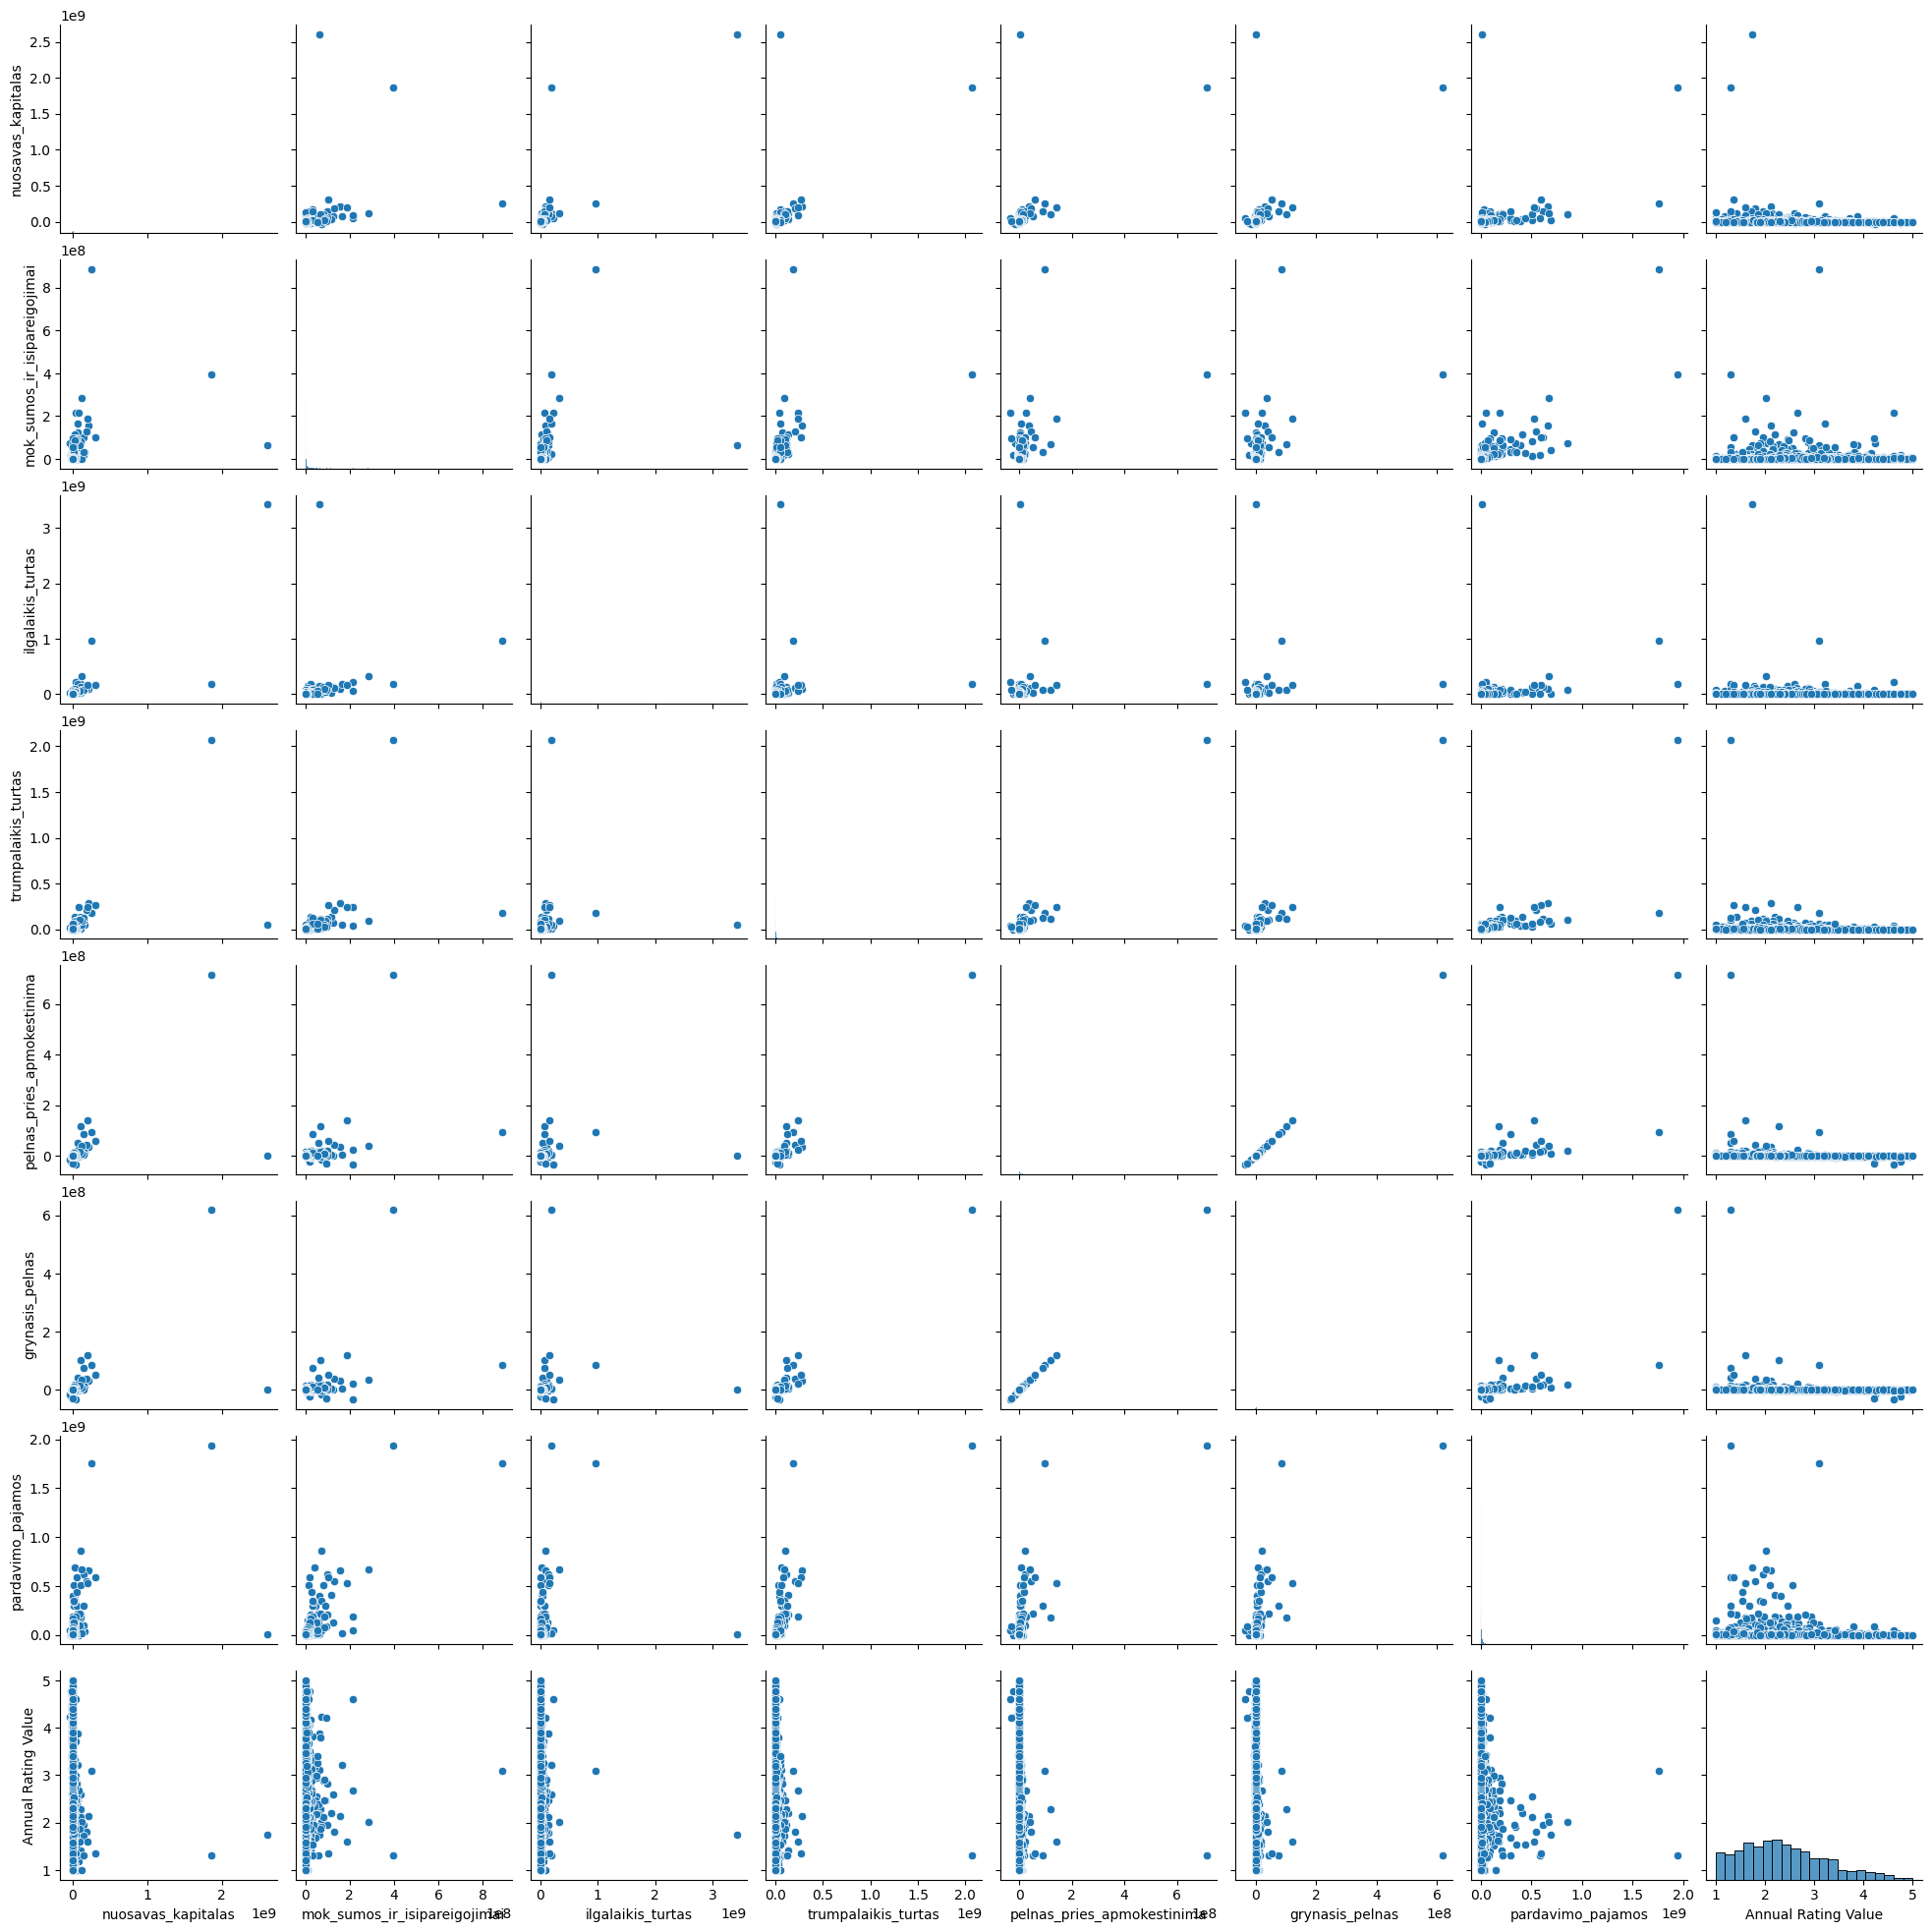

In [50]:
sns.pairplot(dataNoClead, kind="scatter")
plt.show()


In [51]:
dataNoClead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nuosavas_kapitalas            1933 non-null   float64
 1   mok_sumos_ir_isipareigojimai  1933 non-null   float64
 2   ilgalaikis_turtas             1933 non-null   float64
 3   trumpalaikis_turtas           1933 non-null   float64
 4   pelnas_pries_apmokestinima    1933 non-null   float64
 5   grynasis_pelnas               1933 non-null   float64
 6   pardavimo_pajamos             1933 non-null   float64
 7   Annual Rating Value           1933 non-null   float64
dtypes: float64(8)
memory usage: 120.9 KB


In [52]:
# Identify outliers based on a Z-score threshold
z_scores = np.abs((dataNoClead - dataNoClead.mean()) / dataNoClead.std())
data = dataNoClead[(z_scores < 3).all(axis=1)]  # Adjust the threshold as needed
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1899 entries, 0 to 1932
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nuosavas_kapitalas            1899 non-null   float64
 1   mok_sumos_ir_isipareigojimai  1899 non-null   float64
 2   ilgalaikis_turtas             1899 non-null   float64
 3   trumpalaikis_turtas           1899 non-null   float64
 4   pelnas_pries_apmokestinima    1899 non-null   float64
 5   grynasis_pelnas               1899 non-null   float64
 6   pardavimo_pajamos             1899 non-null   float64
 7   Annual Rating Value           1899 non-null   float64
dtypes: float64(8)
memory usage: 133.5 KB


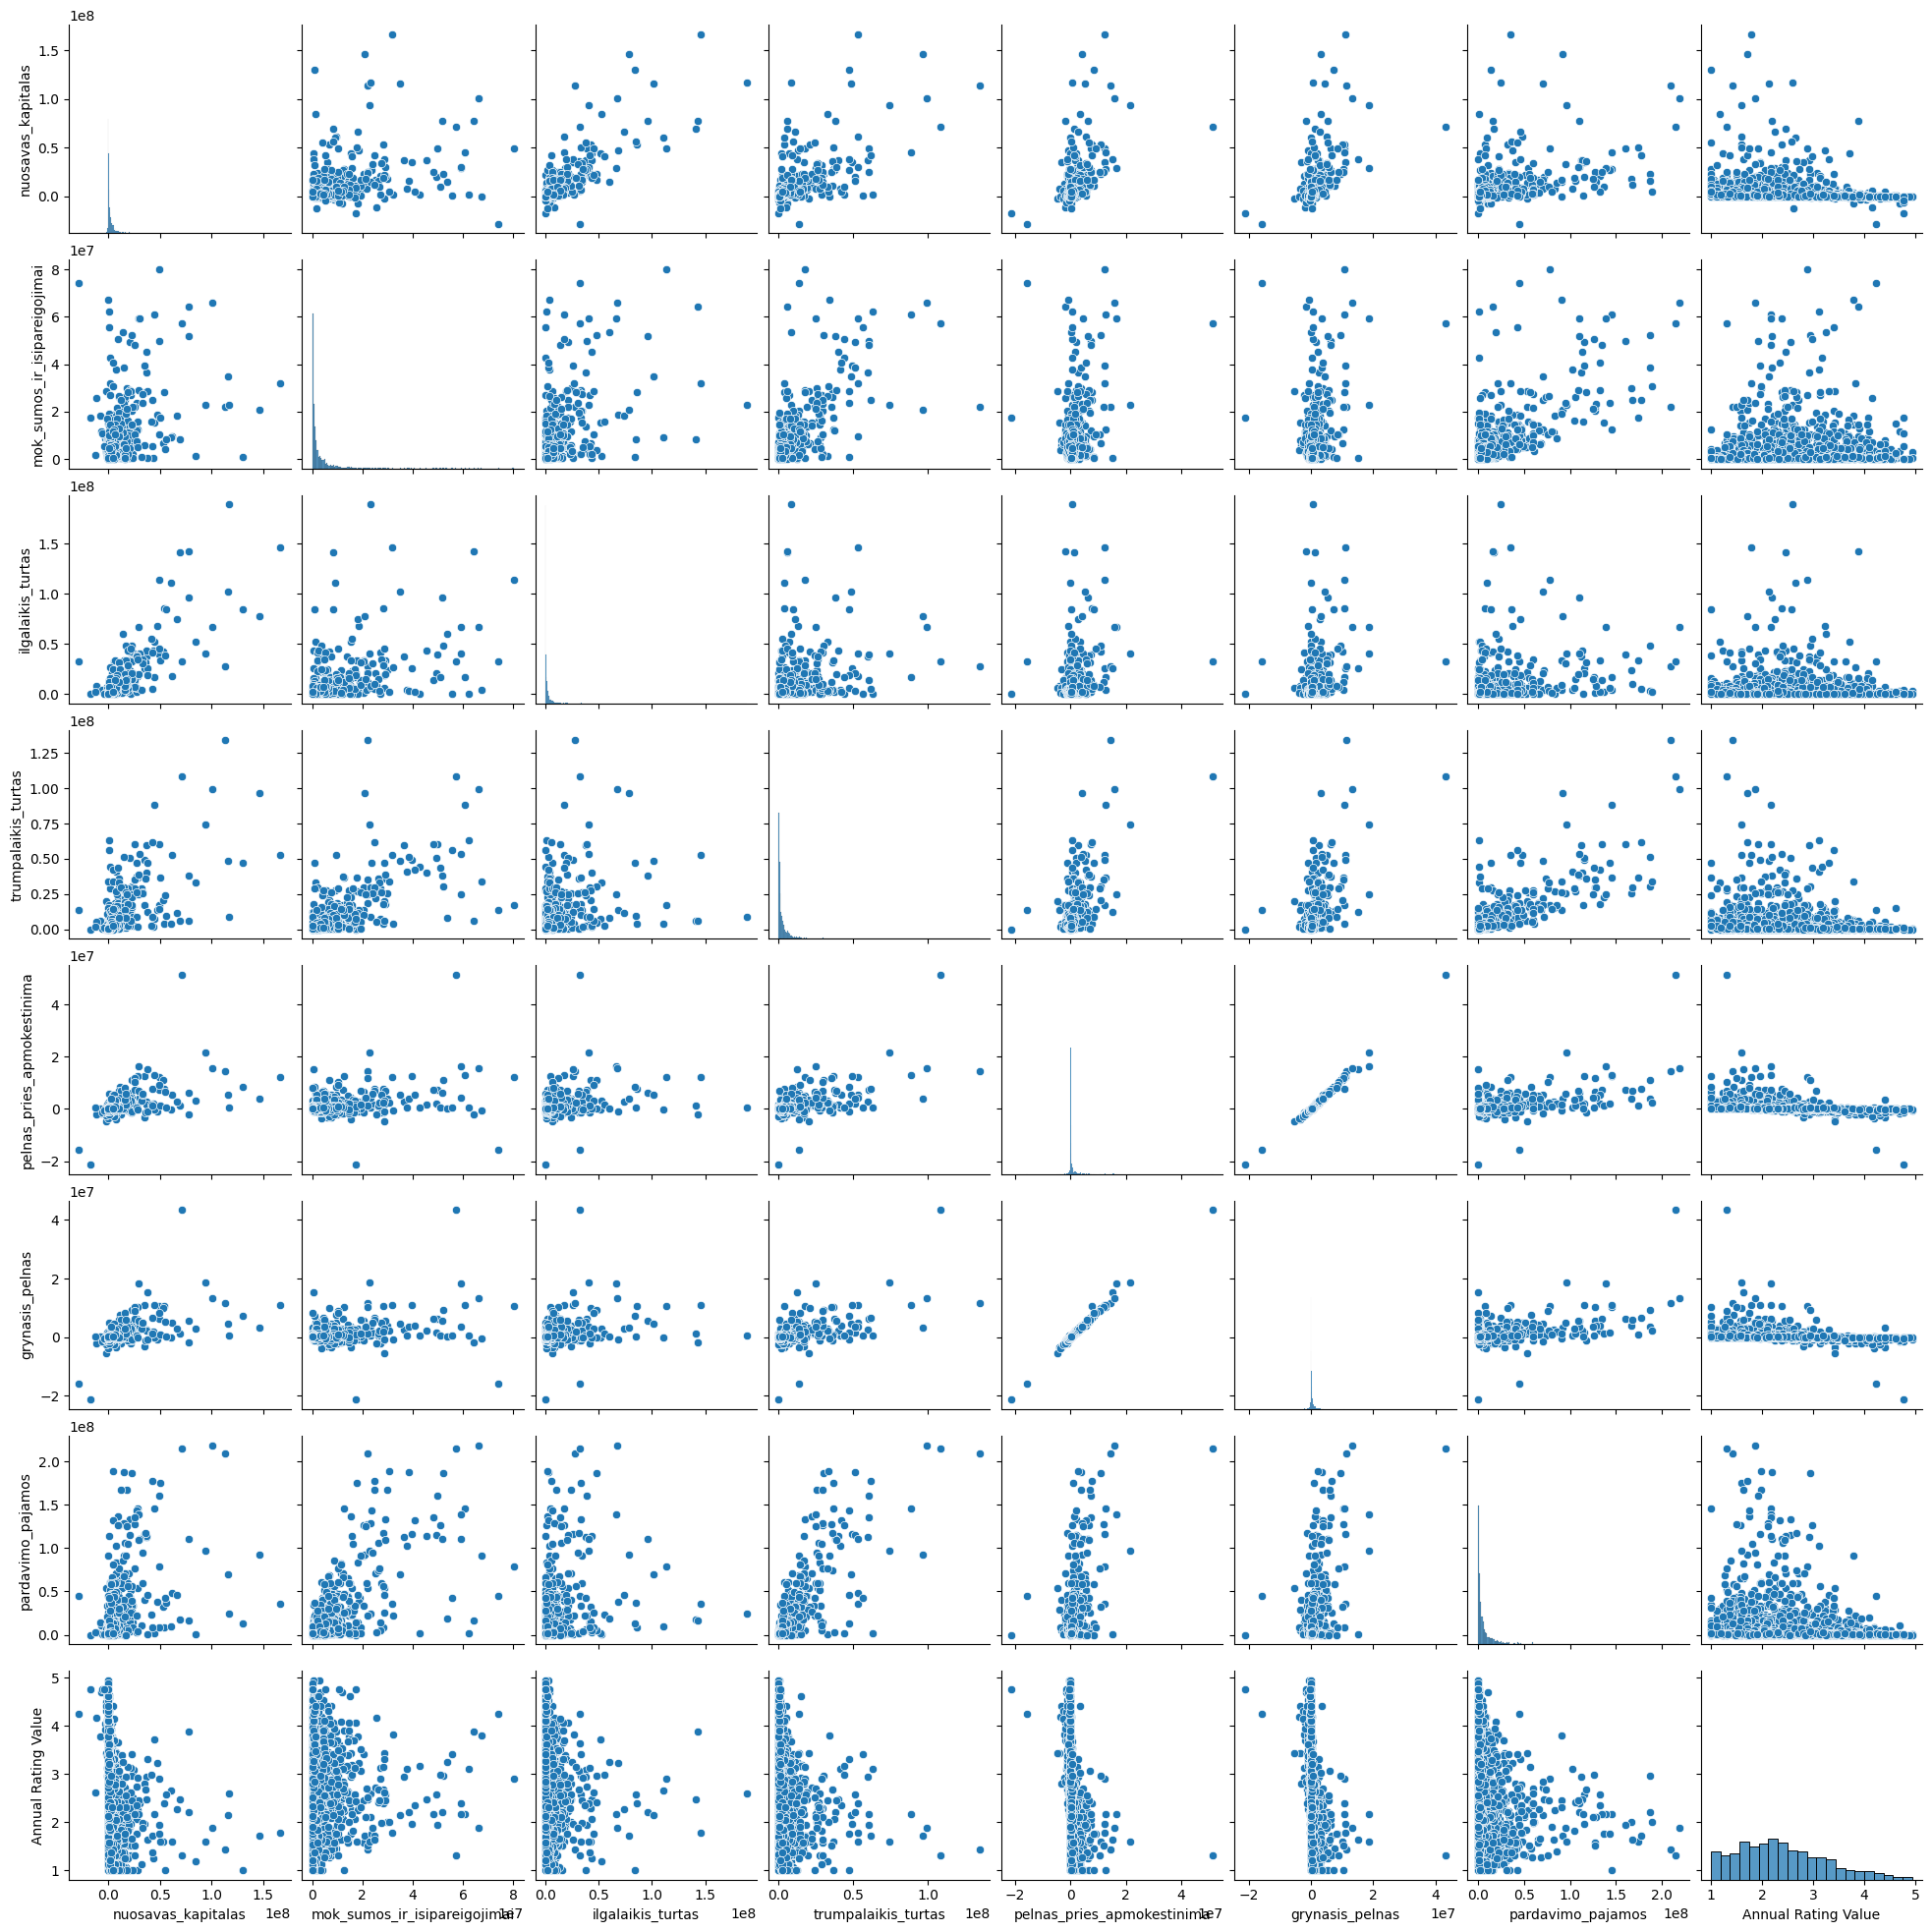

In [53]:
sns.pairplot(data, kind="scatter")
plt.show()

## Multiple Linear Regression

In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['nuosavas_kapitalas', 'mok_sumos_ir_isipareigojimai', 'ilgalaikis_turtas', 'trumpalaikis_turtas', 'pelnas_pries_apmokestinima', 'grynasis_pelnas', 'pardavimo_pajamos']], data['Annual Rating Value'], test_size=0.2, random_state=42)

# Create and fit a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Coefficients: [-2.91465702e-08  2.95558471e-08  2.15097961e-08  1.62204989e-08
  8.88389556e-08 -1.94162616e-07 -9.49148861e-09]
Intercept: 2.3793151828535133
Mean Squared Error: 0.6816351831411352
R-squared: 0.15100418283825257


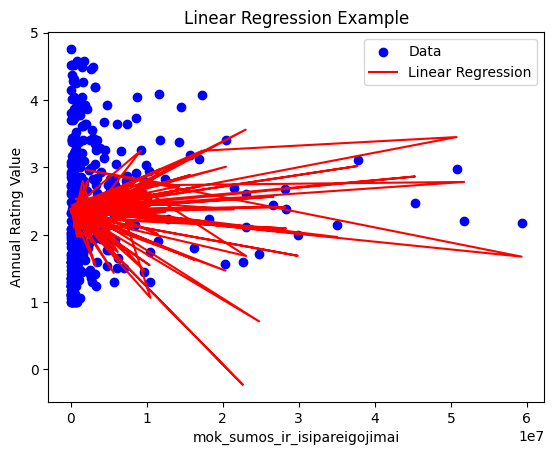

In [55]:
# Create a scatter plot with the linear regression line

# Clip the predicted values to be within the range [1, 5]
# y_pred_clipped = np.clip(y_pred, 1, 5)
plt.scatter(X_test['mok_sumos_ir_isipareigojimai'], y_test, label='Data', color='blue')  # You can choose any X variable for the x-axis
plt.plot(X_test['mok_sumos_ir_isipareigojimai'], y_pred, label='Linear Regression', color='red')  # Same X variable for the x-axis
plt.xlabel('mok_sumos_ir_isipareigojimai')  # Update the label to match the chosen X variable
plt.ylabel('Annual Rating Value')
plt.legend()
plt.title('Linear Regression Example')
plt.show()

In [56]:
# Test the model on a single set of input variables
new_input_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])  # Replace these values with your input data
predicted_y8 = model.predict(new_input_data)  # Predict Y8 based on the input data

print("Predicted Y8 for the new input data:")
print(predicted_y8[0])  # Print the single predicted value

Predicted Y8 for the new input data:
2.3834054916726393


C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [57]:
# Test the model on a single set of input variables
new_input_data = np.array([[15974000.0,	13697000.0	,2890000.0,	30810000.0,	4492000.0,	4552000.0,	512128000.0]])  # Replace these values with your input data
predicted_y8 = model.predict(new_input_data)  # Predict Y8 based on the input data

print("Predicted Y8 for the new input data:")
print(predicted_y8[0])  # Print the single predicted value

Predicted Y8 for the new input data:
-2.465149529731708


C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Polynomial Linear Regression

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['nuosavas_kapitalas', 'mok_sumos_ir_isipareigojimai', 'ilgalaikis_turtas', 'trumpalaikis_turtas', 'pelnas_pries_apmokestinima', 'grynasis_pelnas', 'pardavimo_pajamos']], data['Annual Rating Value'], test_size=0.2, random_state=42)

# Create Polynomial Features
poly = PolynomialFeatures(degree=2)  # You can choose the degree you want
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit a Polynomial Linear Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.7034752985062636
R-squared: -1.1217264584341833


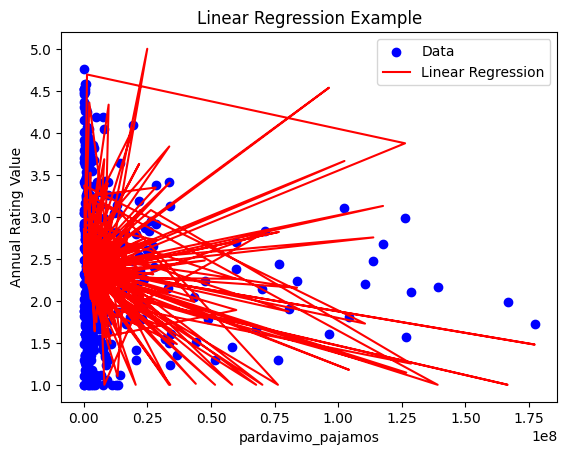

In [59]:
# Create a scatter plot with the linear regression line
# Clip the predicted values to be within the range [1, 5]
y_pred_clipped = np.clip(y_pred, 1, 5)
plt.scatter(X_test['pardavimo_pajamos'], y_test, label='Data', color='blue')  # You can choose any X variable for the x-axis
plt.plot(X_test['pardavimo_pajamos'], y_pred_clipped, label='Linear Regression', color='red')  # Same X variable for the x-axis
plt.xlabel('pardavimo_pajamos')  # Update the label to match the chosen X variable
plt.ylabel('Annual Rating Value')
plt.legend()
plt.title('Linear Regression Example')
plt.show()

In [60]:
# Test the model on new data
new_input_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])  # Replace these values with your input data
new_input_data_poly = poly.transform(new_input_data)  # Transform the input data to include polynomial features
predicted_y8 = model.predict(new_input_data_poly)  # Predict Y8 based on the input data

# Clip the predicted value to be within the range [1, 5]
predicted_y8_clipped = np.clip(predicted_y8, 1, 5)

print("Predicted Y8 for the new input data (clipped):")
print(predicted_y8_clipped[0])  # Print the single predicted value (clipped to [1, 5])

Predicted Y8 for the new input data (clipped):
2.4074921768211985


C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [61]:
# Test the model on new data
new_input_data = np.array([[15974000.0,	13697000.0	,2890000.0,	30810000.0,	4492000.0,	4552000.0,	512128000.0]])  # Replace these values with your input data
new_input_data_poly = poly.transform(new_input_data)  # Transform the input data to include polynomial features
predicted_y8 = model.predict(new_input_data_poly)  # Predict Y8 based on the input data

# Clip the predicted value to be within the range [1, 5]
predicted_y8_clipped = np.clip(predicted_y8, 1, 5)

print("Predicted Y8 for the new input data (clipped):")
print(predicted_y8_clipped[0])  # Print the single predicted value (clipped to [1, 5])

Predicted Y8 for the new input data (clipped):
1.0


C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


## Artificial Neural Network (ANN)

In [62]:
# Replace 'your_dataset.csv' with the actual name of your dataset
df = data

# Assuming your dataset has columns named 'col1', 'col2', ..., 'col8'
X = df.iloc[:, :7].values  # Input features
y = df.iloc[:, 7].values   # Output (rating)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
model = Sequential()

# Adjust the number of units and activation function as needed
model.add(Dense(units=64, activation='relu', input_dim=7))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # Assuming rating is a continuous value

model.compile(optimizer='adam', loss='mean_squared_error')

In [66]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


48/48 [==============================] - 1s 6ms/step - loss: 3.6824 - val_loss: 1.8793
Epoch 2/50
48/48 [==============================] - 0s 4ms/step - loss: 1.4259 - val_loss: 1.0563
Epoch 3/50
48/48 [==============================] - 0s 3ms/step - loss: 1.1203 - val_loss: 0.9332
Epoch 4/50
48/48 [==============================] - 0s 4ms/step - loss: 0.8720 - val_loss: 0.7965
Epoch 5/50
48/48 [==============================] - 0s 4ms/step - loss: 0.7282 - val_loss: 0.7108
Epoch 6/50
48/48 [==============================] - 0s 4ms/step - loss: 0.6299 - val_loss: 0.6374
Epoch 7/50
48/48 [==============================] - 0s 4ms/step - loss: 0.5585 - val_loss: 0.5867
Epoch 8/50
48/48 [==============================] - 0s 4ms/step - loss: 0.4978 - val_loss: 0.5402
Epoch 9/50
48/48 [==============================] - 0s 4ms/step - loss: 0.4512 - val_loss: 0.4967
Epoch 10/50
48/48 [==============================] - 0s 4ms/step - loss: 0.4092 - val_loss: 0.4649
Epoch 11/50
48/48 [===========

In [67]:
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {loss}')

12/12 [==============================] - 0s 2ms/step - loss: 0.2531
Mean Squared Error on Test Set: 0.25307461619377136


In [68]:
# Now, let's say you have new data for prediction (7 columns)
new_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])

# Standardize the new data using the same scaler
scaled_new_data = scaler.transform(new_data)

# Make predictions on the new data
predicted_rating = model.predict(scaled_new_data)

# Output the result
print(f'Predicted Rating for the New Data: {predicted_rating[0][0]}')

1/1 [==============================] - 0s 65ms/step
Predicted Rating for the New Data: 2.471745729446411


In [69]:
# Now, let's say you have new data for prediction (7 columns)
new_data = np.array([[15974000.0,	13697000.0	,2890000.0,	30810000.0,	4492000.0,	4552000.0,	512128000.0]])

# Standardize the new data using the same scaler
scaled_new_data = scaler.transform(new_data)

# Make predictions on the new data
predicted_rating = model.predict(scaled_new_data)

# Output the result
print(f'Predicted Rating for the New Data: {predicted_rating[0][0]}')

1/1 [==============================] - 0s 31ms/step
Predicted Rating for the New Data: 1.284183144569397


## Random Forest 


In [70]:
# Assuming you have a dataset with 8 columns and named 'your_dataset.csv'
df = data

# Assuming your dataset has columns named 'col1', 'col2', ..., 'col8'
X = df.iloc[:, :7].values  # Input features
y = df.iloc[:, 7].values   # Output (rating)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


Mean Squared Error on Test Set: 0.11258416655427635


In [75]:
# Now, let's say you have new data for prediction (7 columns)
new_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])

# Standardize the new data using the same scaler
scaled_new_data = scaler.transform(new_data)

# Make predictions on the new data
predicted_rating = rf_model.predict(scaled_new_data)

# Output the result
print(f'Predicted Rating for the New Data: {predicted_rating[0]}')

Predicted Rating for the New Data: 3.729199999999996


In [76]:

# Now, let's say you have new data for prediction (7 columns)
new_data = np.array([[15974000.0,	13697000.0	,2890000.0,	30810000.0,	4492000.0,	4552000.0,	512128000.0]])

# Standardize the new data using the same scaler
scaled_new_data = scaler.transform(new_data)

# Make predictions on the new data
predicted_rating = rf_model.predict(scaled_new_data)

# Output the result
print(f'Predicted Rating for the New Data: {predicted_rating[0]}')

Predicted Rating for the New Data: 1.5413999999999992


## Long Short-Term Memory (LSTM) 

In [78]:
# Assuming you have a dataset with 8 columns and named 'your_dataset.csv'
df = data

# Assuming your dataset has columns named 'col1', 'col2', ..., 'col8'
X = df.iloc[:, :7].values  # Input features
y = df.iloc[:, 7].values   # Output (rating)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data for LSTM (assuming a time series sequence)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(1, 7)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {loss}')

Epoch 1/50
48/48 [==============================] - 2s 12ms/step - loss: 5.3068 - val_loss: 4.1591
Epoch 2/50
48/48 [==============================] - 0s 5ms/step - loss: 2.2932 - val_loss: 1.1190
Epoch 3/50
48/48 [==============================] - 0s 5ms/step - loss: 0.9258 - val_loss: 0.8299
Epoch 4/50
48/48 [==============================] - 0s 5ms/step - loss: 0.6872 - val_loss: 0.6568
Epoch 5/50
48/48 [==============================] - 0s 5ms/step - loss: 0.5621 - val_loss: 0.5773
Epoch 6/50
48/48 [==============================] - 0s 5ms/step - loss: 0.4890 - val_loss: 0.5385
Epoch 7/50
48/48 [==============================] - 0s 5ms/step - loss: 0.4512 - val_loss: 0.5139
Epoch 8/50
48/48 [==============================] - 0s 4ms/step - loss: 0.4268 - val_loss: 0.4770
Epoch 9/50
48/48 [==============================] - 0s 5ms/step - loss: 0.4129 - val_loss: 0.4666
Epoch 10/50
48/48 [==============================] - 0s 5ms/step - loss: 0.3973 - val_loss: 0.4582
Epoch 11/50
48/48 

In [82]:
# Now, let's say you have new data for prediction (7 columns)
new_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])

# Standardize the new data using the same scaler
scaled_new_data = scaler.transform(new_data)

# Reshape the new data for prediction
scaled_new_data = scaled_new_data.reshape(1, 1, 7)

# Make predictions on the new data
predicted_rating = model.predict(scaled_new_data)

# Output the result
print(f'Predicted Rating for the New Data: {predicted_rating[0][0]}')

1/1 [==============================] - 0s 27ms/step
Predicted Rating for the New Data: 2.682112216949463


In [83]:
# Now, let's say you have new data for prediction (7 columns)
new_data = np.array([[15974000.0, 13697000.0, 2890000.0, 30810000.0, 4492000.0, 4552000.0, 512128000.0]])

# Standardize the new data using the same scaler
scaled_new_data = scaler.transform(new_data)

# Reshape the new data for prediction
scaled_new_data = scaled_new_data.reshape(1, 1, 7)

# Make predictions on the new data
predicted_rating = model.predict(scaled_new_data)

# Output the result
print(f'Predicted Rating for the New Data: {predicted_rating[0][0]}')


1/1 [==============================] - 0s 31ms/step
Predicted Rating for the New Data: 0.7116303443908691


## K-Means

In [89]:
# Assuming you have a dataset with 8 columns and named 'your_dataset.csv'
df = data

# Assuming your dataset has columns named 'col1', 'col2', ..., 'col8'
X = df.iloc[:, :7].values  # Input features

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Assuming you want to cluster the data into, for example, 3 clusters
n_clusters = 5

# Build the K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model on the training data
kmeans.fit(X_train)

# Predict cluster labels for the test data
test_labels = kmeans.predict(X_test)

C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [90]:
# Now, let's say you have new data for prediction (7 columns)
new_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])

# Standardize the new data using the same scaler
scaled_new_data = scaler.transform(new_data)

# Predict the cluster for the new data
new_data_cluster = kmeans.predict(scaled_new_data)

# Output the result
print(f'Predicted Cluster for the New Data: {new_data_cluster[0]}')

Predicted Cluster for the New Data: 0


In [91]:
# Now, let's say you have new data for prediction (7 columns)
new_data = np.array([[15974000.0, 13697000.0, 2890000.0, 30810000.0, 4492000.0, 4552000.0, 512128000.0]])

# Standardize the new data using the same scaler
scaled_new_data = scaler.transform(new_data)

# Predict the cluster for the new data
new_data_cluster = kmeans.predict(scaled_new_data)

# Output the result
print(f'Predicted Cluster for the New Data: {new_data_cluster[0]}')

Predicted Cluster for the New Data: 1


C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

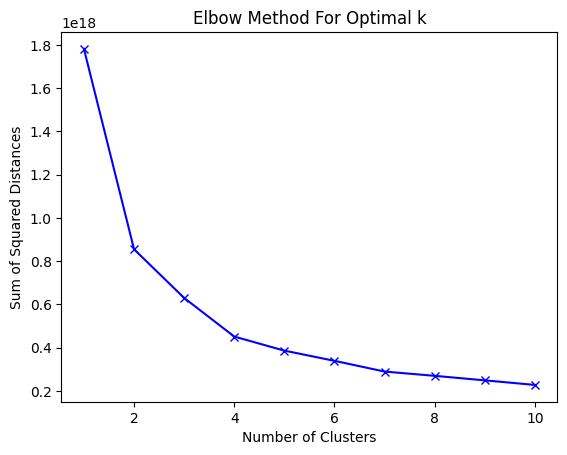

In [92]:
# Assuming X is your standardized data
sum_of_squared_distances = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()